In [15]:
import pandas as pd
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data, meta = arff.loadarff(r'C:\Users\gzmce\OneDrive - Firat University\Masaüstü\artificalGerekli\compound.arff')
df = pd.DataFrame(data)
df

,x,y,class
0,26.75,22.15,b'1'
1,29.80,22.15,b'1'
2,31.55,21.10,b'1'
3,27.70,20.85,b'1'
4,29.90,19.95,b'1'
...,...,...,...
394,15.85,9.95,b'6'
395,15.35,9.90,b'6'
396,15.60,9.45,b'6'
397,15.30,9.15,b'6'


In [16]:
from sklearn.preprocessing import StandardScaler

# Sayısal verileri al
X = np.column_stack((data['x'], data['y']))

# Standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
print(data_pd.columns)

NameError: name 'data_pd' is not defined

In [18]:
data_pd = pd.DataFrame(data)
data_pd["class"] = data_pd["class"].apply(lambda c : c.decode("utf-8"))
data_pd["class"] = data_pd["class"].apply(lambda c : int(c) if c != 'noise' else -1)
data_pd #classları sayısal yaptık.

,x,y,class
0,26.75,22.15,1
1,29.80,22.15,1
2,31.55,21.10,1
3,27.70,20.85,1
4,29.90,19.95,1
...,...,...,...
394,15.85,9.95,6
395,15.35,9.90,6
396,15.60,9.45,6
397,15.30,9.15,6


In [19]:
pd.DataFrame(data)["class"].value_counts()

class
b'5'    158
b'2'     92
b'1'     50
b'4'     45
b'3'     38
b'6'     16
Name: count, dtype: int64

### k means

In [20]:
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [21]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(data_pd["class"],y_kmeans) 

0.683777069494397

In [22]:
import time

start = time.time()

kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.0056 saniye


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### agglomerative

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=6)
labels_agg = agg.fit_predict(X_scaled)

In [24]:
normalized_mutual_info_score(data_pd["class"],labels_agg) 

0.6981450403918463

In [25]:
import time

start = time.time()

agg = AgglomerativeClustering(n_clusters=6)
labels_agg = agg.fit_predict(X_scaled)

end = time.time()
print(f"çalışma süresi: {end - start:.4f} saniye")

çalışma süresi: 0.0021 saniye


### dbscan 

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Kategorik sütunları decode et (gerekliyse)
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# X ve Y özelliklerini al
X = df.iloc[:, [0, 1]].values

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN modelini oluştur
dbscan = DBSCAN(eps=0.2) #yada min_samples=10 değeri verilmeli
labels = dbscan.fit_predict(X_scaled)

In [39]:
normalized_mutual_info_score(data_pd["class"],labels) 

0.9040201287246405

In [28]:
import time

start = time.time()

dbscan = DBSCAN(eps=0.2) #yada min_samples=10 değeri verilmeli
labels = dbscan.fit_predict(X_scaled)

end = time.time()
print(f"çalışma süresi: {end - start:.4f} saniye")

çalışma süresi: 0.0034 saniye


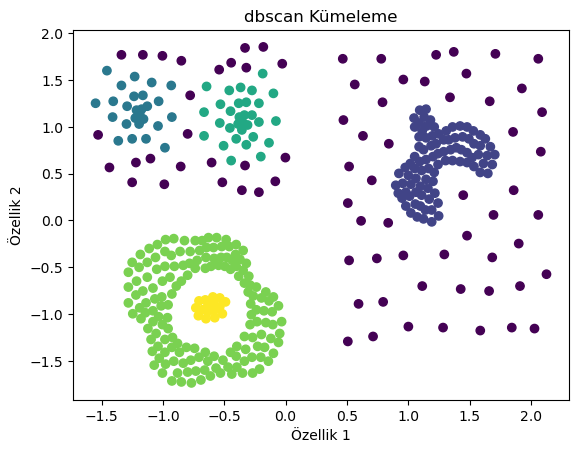

In [29]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('dbscan Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

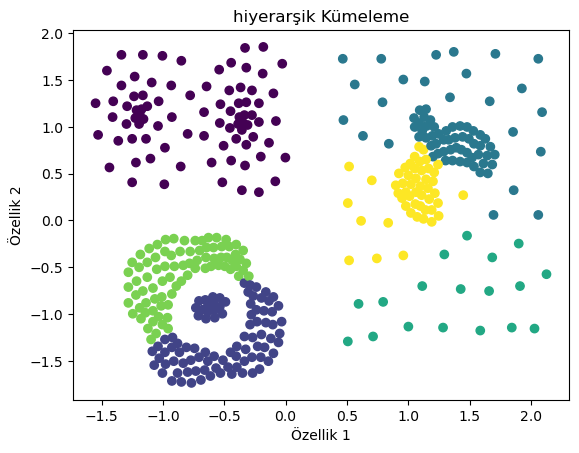

In [33]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='viridis')
plt.title('hiyerarşik Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

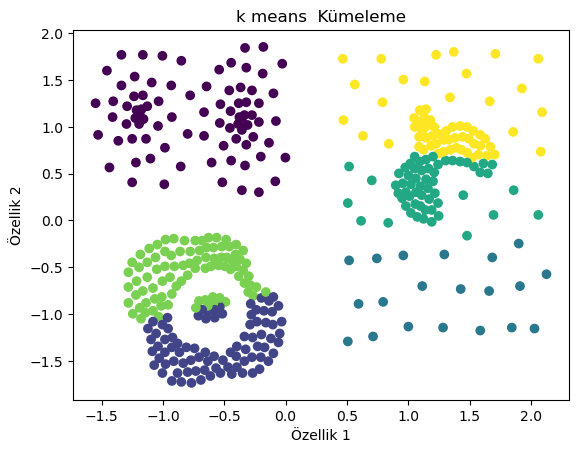

In [32]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('k means  Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()